<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install detecto

In [2]:
!pip install torch==1.4

     |████████████████████████████████| 753.4MB 21kB/s 
ERROR: torchvision 0.6.1+cu101 has requirement torch==1.5.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101


In [3]:
!pip install torchvision==0.5.0

     |████████████████████████████████| 4.0MB 8.3MB/s 
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [4]:
from detecto import core, utils, visualize
import torch
import matplotlib.pyplot as plt
from detecto.utils import read_image

In [5]:
print(torch.cuda.is_available())

True


In [6]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/object detection')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls

Train  Validation


In [8]:
from detecto.utils import xml_to_csv

#xml_to_csv('xml/', 'labels.csv') 
dataset = core.Dataset('Train/')

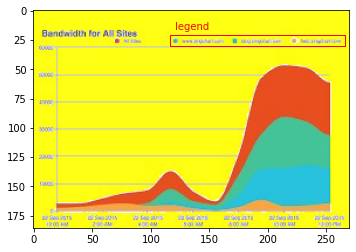

In [11]:
from detecto.visualize import show_labeled_image

image, targets = dataset[105]
show_labeled_image(image, targets['boxes'], targets['labels'])

In [ ]:
#dataset = core.Dataset('Annotations/', 'Train/')
#image, target = dataset[0]
#print(image, target)

In [13]:
model = core.Model(['title', 'legend', 'axis label'])
val_dataset = core.Dataset('Validation/')
model.fit(dataset, val_dataset, epochs=5, verbose=True, learning_rate=0.001)

Epoch 1 of 5
Loss: 0.18021289423470283
Epoch 2 of 5
Loss: 0.16729345915114713
Epoch 3 of 5
Loss: 0.14781844826777363
Epoch 4 of 5
Loss: 0.1493416232858888
Epoch 5 of 5
Loss: 0.15064607272183317


[0.18021289423470283,
 0.16729345915114713,
 0.14781844826777363,
 0.1493416232858888,
 0.15064607272183317]

In [14]:
from google.colab import files
uploaded = files.upload()

Saving 2138674.jpeg to 2138674.jpeg


In [15]:
image2 = utils.read_image('2138674.jpeg')

In [16]:
predictions = model.predict_top(image2)
labels, boxes, scores = predictions

In [17]:
print(labels)

['axis label', 'title']


In [18]:
print(boxes)

tensor([[  3.4986, 175.1102,  22.5356, 257.8622],
        [117.4597,  24.5656, 459.9441,  49.3273]])


In [19]:
print(scores)

tensor([0.7987, 0.9457])


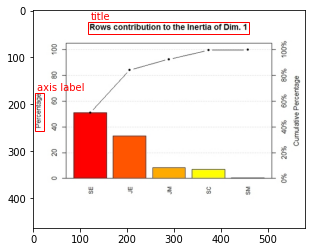

In [20]:
visualize.show_labeled_image(image2, boxes, labels)

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Connected-Home-Pie-Chart.jpg to Connected-Home-Pie-Chart.jpg


In [22]:
image3 = utils.read_image('Connected-Home-Pie-Chart.jpg')
predictions3 = model.predict_top(image3)
labels3, boxes3, scores3 = predictions3

In [24]:
print(labels3)

['axis label', 'legend', 'title']


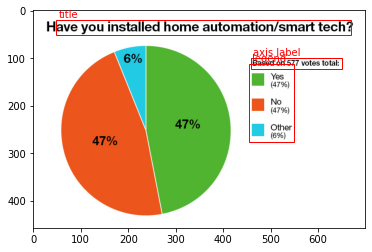

In [23]:
visualize.show_labeled_image(image3, boxes3, labels3)